In [1]:
import easygraph as eg
import csv
import pandas as pd
import networkx as nx
import numpy as np
import random
        
def make_graph_country(filepath:str):
    G=eg.Graph()
    nodes=[]
    nodes_attr=[]
    edges=[]
    edges_attr=[]
    f=open(filepath,'r')
    next(f)
    csv_reader=csv.reader(f)
    for row in csv_reader:
        i=str(row[2])
        j=str(row[5])
        if i not in nodes:
            nodes.append(i)
        if j not in nodes:
            nodes.append(j)

        if (i,j) in edges:
            index=edges.index((i,j))
            edges_attr[index]['weight']+=1
        else:
            edges.append((i,j))
            temp3={}
            temp3['weight']=1
            edges_attr.append(temp3)

    G.add_nodes(nodes)
    G.add_edges(edges,edges_attr)
    return G



In [2]:
def make_graph(filepath:str):
    G=eg.Graph()
    nodes=[]
    nodes_attr=[]
    edges=[]
    edges_attr=[]
    f=open(filepath,'r')
    next(f)
    csv_reader=csv.reader(f)
    for row in csv_reader:
        i=str(row[0])
        i_affifiation=str(row[1])
        i_country=str(row[2])
        j=str(row[3])
        j_affifiation=str(row[4])
        j_country=str(row[5])
        year=int(row[6])
        area=str(row[7])

        nodes.append(i)
        temp1={}
        temp1['affiliation']=i_affifiation
        temp1['country']=i_country
        nodes_attr.append(temp1)

        nodes.append(j)
        temp2={}
        temp2['affiliation']=j_affifiation
        temp2['country']=j_country
        nodes_attr.append(temp2)

        edges.append((i,j))
        temp3={}
        temp3['year']=year
        temp3['area']=area
        edges_attr.append(temp3)

    G.add_nodes(nodes,nodes_attr)
    G.add_edges(edges,edges_attr)
    return G


In [3]:
G1=make_graph("faculty-coauthors.csv")

In [4]:
G2=make_graph_country('faculty-coauthors.csv')

In [20]:
country={
    'us':{
        'author':[],
        'institute':[],
        'collaboration':0,
        'international':0
    },
    'cn':{
        'author':[],
        'institute':[],
        'collaboration':0,
        'international':0
    },
    'uk':{
        'author':[],
        'institute':[],
        'collaboration':0,
        'international':0
    },
    'nl':{
        'author':[],
        'institute':[],
        'collaboration':0,
        'international':0
    },
    'in':{
        'author':[],
        'institute':[],
        'collaboration':0,
        'international':0
    },
    'de':{
        'author':[],
        'institute':[],
        'collaboration':0,
        'international':0
    },
    'fr':{
        'author':[],
        'institute':[],
        'collaboration':0,
        'international':0
    },
    'au':{
        'author':[],
        'institute':[],
        'collaboration':0,
        'international':0
    }
}

In [21]:
affiliation={}
f=open('country-info2.csv','r')
csv_reader=csv.reader(f)
for row in csv_reader:
    k=str(row[0])
    v=str(row[2])
    affiliation[k]=v

In [38]:
total={
    'author':[],
    'institute':[]
}
for i in G1.nodes:
    if G1.nodes[i]['country'] in country.keys():
        if i not in country[G1.nodes[i]['country']]['author']:
            country[G1.nodes[i]['country']]['author'].append(i)
        if G1.nodes[i]['affiliation'] not in country[G1.nodes[i]['country']]['institute']:
            country[G1.nodes[i]['country']]['institute'].append(G1.nodes[i]['affiliation'])
    if i not in total['author']:
        total['author'].append(i)
    if G1.nodes[i]['affiliation'] not in total['institute']:
        total['institute'].append(G1.nodes[i]['affiliation'])

In [28]:
d={}
t={
    'total':0,
    'inter':0
}
for e in G2.edges:
    (i,j,k)=e
    if i not in d:
        d[i]={}
        d[i]['total']=0
    if i!=j:
        if 'inter' not in d[i].keys():
            d[i]["inter"]=0
            d[i]["inter"]+=k['weight']
        else:
            d[i]["inter"]+=k['weight']
        t['inter']+=k['weight']
    d[i]["total"]+=k['weight']
    t['total']+=k['weight']

In [29]:
print(d['us'],d['cn'],d['uk'],d['nl'],d['in'],d['de'],d['fr'],d['au'])

{'total': 4653, 'inter': 913} {'total': 2200, 'inter': 340} {'total': 325, 'inter': 55} {'total': 404, 'inter': 38} {'total': 558, 'inter': 38} {'total': 369, 'inter': 51} {'total': 282, 'inter': 30} {'total': 255, 'inter': 71}


In [30]:
print(t)

{'total': 11753, 'inter': 1879}


In [39]:
for i in country:
    print(i)
    print(len(country[i]['author']))
    print(len(country[i]['institute']))

us
1370
233
cn
517
102
uk
126
37
nl
135
26
in
199
60
de
131
46
fr
110
29
au
83
20


In [40]:
print(len(total['author']))
print(len(total['institute']))

3757
955


In [60]:
country={
    'us':{
        'paper':0,
        'author':[]
    },
    'cn':{
        'paper':0,
        'count':0,
        'author':[]
    },
    'nl':{
        'paper':0,
        'count':0,
        'year':0,
        'author':[]
    },
    'in':{
        'paper':0,
        'count':0,
        'year':0,
        'author':[]
    },
    'uk':{
        'paper':0,
        'count':0,
        'year':0,
        'author':[]
    },
    'au':{
        'paper':0,
        'count':0,
        'year':0,
        'author':[]
    },
    'de':{
        'paper':0,
        'count':0,
        'year':0,
        'author':[]
    }
}
country_shs={
    'us':{
        'paper':0,
        'count':0,
        'year':0,
        'author':[]
    },
    'cn':{
        'paper':0,
        'count':0,
        'year':0,
        'author':[]
    },
    'nl':{
        'paper':0,
        'count':0,
        'year':0,
        'author':[]
    },
    'in':{
        'paper':0,
        'count':0,
        'year':0,
        'author':[]
    },
    'uk':{
        'paper':0,
        'count':0,
        'year':0,
        'author':[]
    },
    'au':{
        'paper':0,
        'count':0,
        'year':0,
        'author':[]
    },
    'de':{
        'paper':0,
        'count':0,
        'year':0,
        'author':[]
    }
}

In [61]:
def degree_centrality(G):
    if len(G) <= 1:
        return {n: 1 for n in G}
    
    s = 1.0 / (len(G) - 1.0)
    centrality={}
    for i in G.degree():
        centrality[i]=int(G.degree()[i])*s
    return centrality

degree_centrality=degree_centrality(G2)
for i in degree_centrality:
    if i in country.keys():
        country[i]['degree_centrality']=degree_centrality[i]



In [62]:
betweenness_centrality=eg.betweenness_centrality(G2)
for i in betweenness_centrality:
    if i in country.keys():
        country[i]['betweenness_centrality']=betweenness_centrality[i]


In [63]:
closeness_centrality=eg.closeness_centrality(G2)
for i in closeness_centrality:
    if i in country.keys():
        country[i]['closeness_centrality']=closeness_centrality[i]


In [64]:
Gn2=nx.Graph()
for i in G2.edges:
    (u,v,t)=i
    Gn2.add_edge(u,v)

clustering_coefficient=nx.clustering(Gn2)
for i in clustering_coefficient:
    if i in country.keys():
        country[i]['clustering_coefficient']=clustering_coefficient[i]



In [65]:
print(country)

{'us': {'degree_centrality': 122.60869565217392, 'betweenness_centrality': 0.5259904561644365, 'closeness_centrality': 0.8387929323009728, 'clustering_coefficient': 0.10588972431077694}, 'cn': {'degree_centrality': 61.88405797101449, 'betweenness_centrality': 0.04756115792594457, 'closeness_centrality': 0.5669618894256575, 'clustering_coefficient': 0.30434782608695654}, 'uk': {'degree_centrality': 10.478260869565217, 'betweenness_centrality': 0.04472030589273823, 'closeness_centrality': 0.5669618894256575, 'clustering_coefficient': 0.3442028985507246}, 'nl': {'degree_centrality': 12.956521739130435, 'betweenness_centrality': 0.039765869017787184, 'closeness_centrality': 0.5669618894256575, 'clustering_coefficient': 0.31620553359683795}, 'de': {'degree_centrality': 10.840579710144928, 'betweenness_centrality': 0.02016440744062227, 'closeness_centrality': 0.5566534914361001, 'clustering_coefficient': 0.40476190476190477}, 'fr': {'degree_centrality': 8.46376811594203, 'betweenness_central

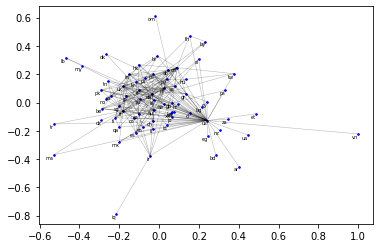

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import random
def draw_kamada_kawai(G,rate=1,style="side"):
    """Draw the graph G with a Kamada-Kawai force-directed layout.

    Parameters
    ----------
    G : graph
       A networkx graph

    rate : float
       The proportion of visible points and edges to the total 

    style : stirng
        "side"- the label is next to the dot
        "center"- the label is in the center of the dot

    """
    pos=eg.kamada_kawai_layout(G)
    node=np.zeros((len(pos),2),float)
    m,n=0,0
    if rate==1:
        for i in pos:
            node[m][0]=pos[i][0]
            node[m][1]=pos[i][1]
            m+=1
        if style=='side':
            plt.scatter(node[:,0], node[:,1], marker = '.', color = 'b', s=10)
        elif style=='center':
            plt.scatter(node[:,0], node[:,1], marker = 'o', color='None',edgecolors = 'b', s=50,linewidth=0.5)
        k=0
        for i in pos:
            if style=='side':
                plt.text(pos[i][0], pos[i][1], i,
                fontsize=5,
                verticalalignment="top",
                horizontalalignment="right")
            elif style=='center':
                plt.text(pos[i][0], pos[i][1], i,
                fontsize=5,
                verticalalignment="center",
                horizontalalignment="center")
            k+=1
        for i in G.edges:
            p1=[pos[i[0]][0],pos[i[1]][0]]
            p2=[pos[i[0]][1],pos[i[1]][1]]
            plt.plot(p1,p2, 'k-',alpha=0.3,linewidth=0.5) 
        plt.savefig('country.svg')#输出
        plt.show()
    else:
        degree=G.degree()
        sorted_degree=sorted(degree.items(), key=lambda d: d[1],reverse=True)
        l=int(rate*len(G))
        s=[]
        for i in sorted_degree:
            if len(s)<l:
                s.append(i[0])
        for i in pos:
            if i in s:
                node[m][0]=pos[i][0]
                node[m][1]=pos[i][1]
                m+=1
        node=node[0:m,:]
        if style=='side':
            plt.scatter(node[:,0], node[:,1], marker = '.', color = 'b', s=10)
        elif style=='center':
            plt.scatter(node[:,0], node[:,1], marker = 'o', color='None',edgecolors = 'b', s=50,linewidth=0.5)
        k=0
        for i in pos:
            if i in s:
                if style=='side':
                    plt.text(pos[i][0], pos[i][1], i,
                    fontsize=5,
                    verticalalignment="top",
                    horizontalalignment="right")
                elif style=='center':
                    plt.text(pos[i][0], pos[i][1], i,
                    fontsize=5,
                    verticalalignment="center",
                    horizontalalignment="center")
                k+=1
        for i in G.edges:
            (u,v,t)=i
            if u in s and v in s:
                p1=[pos[i[0]][0],pos[i[1]][0]]
                p2=[pos[i[0]][1],pos[i[1]][1]]
                plt.plot(p1,p2, 'k-',alpha=0.3,linewidth=0.5) 
        plt.savefig('country.svg')#输出
        plt.show()
    return
draw_kamada_kawai(G2)

In [107]:
country={
    'us':{
        'degree':[],
        'degree_centrality':[],
        'betweenness_centrality':[],
        'closeness_centrality':[],
        'clustering_coefficient':[]
    },
    'cn':{
        'degree':[],
        'degree_centrality':[],
        'betweenness_centrality':[],
        'closeness_centrality':[],
        'clustering_coefficient':[]
    },
    'uk':{
        'degree':[],
        'degree_centrality':[],
        'betweenness_centrality':[],
        'closeness_centrality':[],
        'clustering_coefficient':[]
    },
    'nl':{
        'degree':[],
        'degree_centrality':[],
        'betweenness_centrality':[],
        'closeness_centrality':[],
        'clustering_coefficient':[]
    },
    'de':{
        'degree':[],
        'degree_centrality':[],
        'betweenness_centrality':[],
        'closeness_centrality':[],
        'clustering_coefficient':[]
    },
    'fr':{
        'degree':[],
        'degree_centrality':[],
        'betweenness_centrality':[],
        'closeness_centrality':[],
        'clustering_coefficient':[]
    },
    'in':{
        'degree':[],
        'degree_centrality':[],
        'betweenness_centrality':[],
        'closeness_centrality':[],
        'clustering_coefficient':[]
    },
    'au':{
        'degree':[],
        'degree_centrality':[],
        'betweenness_centrality':[],
        'closeness_centrality':[],
        'clustering_coefficient':[]
    },
    'all':{
        'degree':[],
        'degree_centrality':[],
        'betweenness_centrality':[],
        'closeness_centrality':[],
        'clustering_coefficient':[]
    }
}

In [108]:
degree=G1.degree()
for i in degree:
    t=G1.nodes[i]['country']
    if t in country.keys():
        country[t]['degree'].append(degree[i])
    country['all']['degree'].append(degree[i])



def degree_centrality(G):
    if len(G) <= 1:
        return {n: 1 for n in G}
    
    s = 1.0 / (len(G) - 1.0)
    centrality={}
    for i in G.degree():
        centrality[i]=int(G.degree()[i])*s
    return centrality

degree_centrality=degree_centrality(G1)
for i in degree_centrality:
    t=G1.nodes[i]['country']
    if t in country.keys():
        country[t]['degree_centrality'].append(degree_centrality[i])
    country['all']['degree_centrality'].append(degree_centrality[i])


        
        
        

betweenness_centrality=eg.betweenness_centrality(G1)
for i in betweenness_centrality:
    t=G1.nodes[i]['country']
    if t in country.keys():
        country[t]['betweenness_centrality'].append(betweenness_centrality[i])
    country['all']['betweenness_centrality'].append(betweenness_centrality[i])


        
        
        
        
closeness_centrality=eg.closeness_centrality(G1)
for i in closeness_centrality:
    t=G1.nodes[i]['country']
    if t in country.keys():
        country[t]['closeness_centrality'].append(closeness_centrality[i])
    country['all']['closeness_centrality'].append(closeness_centrality[i])


        
        
        
        
Gn1=nx.Graph()
for i in G1.edges:
    (u,v,t)=i
    Gn1.add_edge(u,v)

clustering_coefficient=nx.clustering(Gn1)
for i in clustering_coefficient:
    t=G1.nodes[i]['country']
    if t in country.keys():
        country[t]['clustering_coefficient'].append(clustering_coefficient[i])
    country['all']['clustering_coefficient'].append(clustering_coefficient[i])





In [109]:
avg_author={
    'us':{
        'degree':0,
        'degree_centrality':0,
        'betweenness_centrality':0,
        'closeness_centrality':0,
        'clustering_coefficient':0,
    },
    'cn':{
        'degree':0,
        'degree_centrality':0,
        'betweenness_centrality':0,
        'closeness_centrality':0,
        'clustering_coefficient':0,
    },
    'uk':{
        'degree':0,
        'degree_centrality':0,
        'betweenness_centrality':0,
        'closeness_centrality':0,
        'clustering_coefficient':0,
    },
    'nl':{
        'degree':0,
        'degree_centrality':0,
        'betweenness_centrality':0,
        'closeness_centrality':0,
        'clustering_coefficient':0,
    },
    'de':{
        'degree':0,
        'degree_centrality':0,
        'betweenness_centrality':0,
        'closeness_centrality':0,
        'clustering_coefficient':0,
    },
    'fr':{
        'degree':0,
        'degree_centrality':0,
        'betweenness_centrality':0,
        'closeness_centrality':0,
        'clustering_coefficient':0,
    },
    'in':{
        'degree':0,
        'degree_centrality':0,
        'betweenness_centrality':0,
        'closeness_centrality':0,
        'clustering_coefficient':0,
    },
    'au':{
        'degree':0,
        'degree_centrality':0,
        'betweenness_centrality':0,
        'closeness_centrality':0,
        'clustering_coefficient':0,
    },
    "all":{
        'degree':0,
        'degree_centrality':0,
        'betweenness_centrality':0,
        'closeness_centrality':0,
        'clustering_coefficient':0,
    }
}

In [110]:
for i in country:
    for j in country[i]:
        avg_author[i][j]=sum(country[i][j])/len(country[i][j])
print(avg_author)

{'us': {'degree': 3.1963503649635037, 'degree_centrality': 0.0008509984997240385, 'betweenness_centrality': 4.235415363341053e-05, 'closeness_centrality': 0.004391593219084112, 'clustering_coefficient': 0.7266387638584959}, 'cn': {'degree': 4.326885880077369, 'degree_centrality': 0.0011519930458140002, 'betweenness_centrality': 8.283264379570298e-06, 'closeness_centrality': 0.0048115603817849295, 'clustering_coefficient': 0.8577044573930374}, 'uk': {'degree': 3.4047619047619047, 'degree_centrality': 0.000906486130128302, 'betweenness_centrality': 2.5589025644024768e-05, 'closeness_centrality': 0.005425564942000263, 'clustering_coefficient': 0.8049210930163313}, 'nl': {'degree': 3.488888888888889, 'degree_centrality': 0.0009288841557212156, 'betweenness_centrality': 0.00010467634670259995, 'closeness_centrality': 0.00789318061937138, 'clustering_coefficient': 0.6878172461416189}, 'de': {'degree': 3.1374045801526718, 'degree_centrality': 0.000835304733799965, 'betweenness_centrality': 1.

In [112]:
for i in country:
    for j in country[i]:
        print(len(country[i][j]))

1370
1370
1370
1370
1370
517
517
517
517
517
126
126
126
126
126
135
135
135
135
135
131
131
131
131
131
110
110
110
110
110
199
199
199
199
199
83
83
83
83
83
3757
3757
3757
3757
3757


In [ ]:
# 非合作网络分析

In [132]:
# 合作者
def make_graph_collaboration(filepath:str):
    G=eg.Graph()
    nodes=[]
    nodes_attr=[]
    edges=[]
    edges_attr=[]
    f=open(filepath,'r')
    next(f)
    csv_reader=csv.reader(f)
    for row in csv_reader:
        i=str(row[0])
        j=str(row[3])
        
        i_affifiation=str(row[1])
        i_country=str(row[2]) 
        j_affifiation=str(row[4])
        j_country=str(row[5])
        year=int(row[6])
        area=str(row[7])

        if i not in nodes:
            nodes.append(i)
            temp1={}
            temp1['affiliation']=i_affifiation
            temp1['country']=i_country
            nodes_attr.append(temp1)

        if j not in nodes:
            nodes.append(j)
            temp2={}
            temp2['affiliation']=j_affifiation
            temp2['country']=j_country
            nodes_attr.append(temp2)

        if (i,j) not in edges:       
            edges.append((i,j))
            temp3={}
            temp3['year']=year
            temp3['area']=area
            edges_attr.append(temp3)
        
    print(edges)
    G.add_nodes(nodes,nodes_attr)
    G.add_edges(edges,edges_attr)
    return G



In [133]:
G3=make_graph_collaboration('faculty-coauthors.csv')

[('Evaggelia Pitoura', 'Paraskevas Tsantarliotis'), ('Evaggelia Pitoura', 'Panayiotis Tsaparas'), ('Gianluca Lax', 'Antonia Russo'), ('George Karabatis', 'Ahmed AlEroud'), ('George Karabatis', 'Iyad Alazzam'), ('George Karabatis', 'Zainab Al Latifah'), ('Sibel Adali', 'Benjamin D. Horne'), ('Sibel Adali', "John O'Donovan"), ('Sibel Adali', 'Jin-Hee Cho'), ('Matthias Jarke', 'Ralf Klamma'), ('Matthias Jarke', 'Manh Cuong Pham'), ('Antônio Carlos da Rocha Costa', 'Helder Coelho'), ('Munindar P. Singh', 'Anup K. Kalia'), ('Munindar P. Singh', 'Norbou Buchler'), ('Munindar P. Singh', 'Arwen H. DeCostanza'), ('Munindar P. Singh', 'Chaitanya Shivade'), ('Munindar P. Singh', 'Karthik Sheshadri'), ('Yan Jia 0001', 'Zizhong Huang'), ('Yan Jia 0001', 'Zhihong Tian'), ('Yan Jia 0001', 'Mohsen Guizani'), ('Yan Jia 0001', 'Weihong Han'), ('Haifeng Shen', 'Yuqing Mao'), ('Anupam Joshi', 'Ponnurangam Kumaraguru'), ('Anupam Joshi', 'Paridhi Jain 0001'), ('Srinath Srinivasa', 'Sridhar Mandyam'), ('Srin

In [134]:
country_list=['us','cn','uk','nl','de','fr','in','au','all']
cc={}
degree=G3.degree()
for i in country_list:
    cc[i]=0
for i in G3.nodes:
    if G3.nodes[i]['country'] in country_list:
        cc[G3.nodes[i]['country']]+=degree[i]
print(cc)

{'us': 4379, 'cn': 2237, 'uk': 429, 'nl': 471, 'de': 411, 'fr': 315, 'in': 554, 'au': 415, 'all': 0}


In [136]:
country_list=['us','cn','uk','nl','de','fr','in','au','all']
for i in country_list:
    cc[i]=0
for i in G3.nodes:
    if G3.nodes[i]['country'] in country_list:
        cc[G3.nodes[i]['country']]+=1
print(cc)

{'us': 1370, 'cn': 517, 'uk': 126, 'nl': 135, 'de': 131, 'fr': 110, 'in': 199, 'au': 83, 'all': 0}


In [135]:
G3.degree()

{'Evaggelia Pitoura': 2,
 'Paraskevas Tsantarliotis': 2,
 'Panayiotis Tsaparas': 2,
 'Gianluca Lax': 1,
 'Antonia Russo': 1,
 'George Karabatis': 3,
 'Ahmed AlEroud': 3,
 'Iyad Alazzam': 3,
 'Zainab Al Latifah': 3,
 'Sibel Adali': 3,
 'Benjamin D. Horne': 3,
 "John O'Donovan": 3,
 'Jin-Hee Cho': 3,
 'Matthias Jarke': 2,
 'Ralf Klamma': 2,
 'Manh Cuong Pham': 2,
 'Antônio Carlos da Rocha Costa': 1,
 'Helder Coelho': 1,
 'Munindar P. Singh': 5,
 'Anup K. Kalia': 3,
 'Norbou Buchler': 3,
 'Arwen H. DeCostanza': 4,
 'Chaitanya Shivade': 2,
 'Karthik Sheshadri': 2,
 'Sean M. Fitzhugh': 2,
 'Yan Jia 0001': 4,
 'Zizhong Huang': 4,
 'Zhihong Tian': 7,
 'Mohsen Guizani': 7,
 'Weihong Han': 4,
 'Xiaojiang Du': 4,
 'Yuhan Chai': 4,
 'Jing Qiu 0002': 4,
 'Haifeng Shen': 1,
 'Yuqing Mao': 1,
 'Anupam Joshi': 2,
 'Ponnurangam Kumaraguru': 3,
 'Paridhi Jain 0001': 2,
 'Prateek Dewan': 1,
 'Srinath Srinivasa': 2,
 'Sridhar Mandyam': 2,
 'Raksha Pavagada Subbanarasimha': 2,
 'Gerhard Weikum': 2,
 'Gera

In [124]:
G3.degree()

{'Evaggelia Pitoura': 2,
 'Paraskevas Tsantarliotis': 2,
 'Panayiotis Tsaparas': 2,
 'Gianluca Lax': 1,
 'Antonia Russo': 1,
 'George Karabatis': 3,
 'Ahmed AlEroud': 3,
 'Iyad Alazzam': 3,
 'Zainab Al Latifah': 3,
 'Sibel Adali': 3,
 'Benjamin D. Horne': 3,
 "John O'Donovan": 3,
 'Jin-Hee Cho': 3,
 'Matthias Jarke': 2,
 'Ralf Klamma': 2,
 'Manh Cuong Pham': 2,
 'Antônio Carlos da Rocha Costa': 1,
 'Helder Coelho': 1,
 'Munindar P. Singh': 5,
 'Anup K. Kalia': 3,
 'Norbou Buchler': 3,
 'Arwen H. DeCostanza': 4,
 'Chaitanya Shivade': 2,
 'Karthik Sheshadri': 2,
 'Sean M. Fitzhugh': 2,
 'Yan Jia 0001': 4,
 'Zizhong Huang': 4,
 'Zhihong Tian': 7,
 'Mohsen Guizani': 7,
 'Weihong Han': 4,
 'Xiaojiang Du': 4,
 'Yuhan Chai': 4,
 'Jing Qiu 0002': 4,
 'Haifeng Shen': 1,
 'Yuqing Mao': 1,
 'Anupam Joshi': 2,
 'Ponnurangam Kumaraguru': 3,
 'Paridhi Jain 0001': 2,
 'Prateek Dewan': 1,
 'Srinath Srinivasa': 2,
 'Sridhar Mandyam': 2,
 'Raksha Pavagada Subbanarasimha': 2,
 'Gerhard Weikum': 2,
 'Gera

In [ ]:
# A. Suruliandi	Manonmaniam Sundaranar University	tcss	2	0.58333	2021

f=open('generated-author-info.csv','r')
next(f)
csv_reader=csv.reader(f)
for row in csv_reader:
    if country_list[row[1]] in country.keys():
        country[country_list[row[1]]]['paper']+=float(row[3])
        country[country_list[row[1]]]['count']+=float(row[4])
        country[country_list[row[1]]]['year']+=2021-int(row[5])
        if row[0] not in country[country_list[row[1]]]['author']:
            country[country_list[row[1]]]['author'].append(row[0])
    if row[0] in SHS1 and country_list[row[1]] in country_shs.keys():
        country_shs[country_list[row[1]]]['paper']+=float(row[3])
        country_shs[country_list[row[1]]]['count']+=float(row[4])
        country_shs[country_list[row[1]]]['year']+=2021-int(row[5])
        if row[0] not in country_shs[country_list[row[1]]]['author']:
            country_shs[country_list[row[1]]]['author'].append(row[0])